In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima

# Load dataset (update file path)
df = pd.read_csv(r"C:\Users\jay\Desktop\Kwanza Tukule\Data\Cleaned_data.csv", parse_dates=["DATE"])

# Ensure datetime index
df.set_index("DATE", inplace=True)

# Extract month-year for grouping
df["Month_Year"] = df.index.to_period("M")



🚨 ALERT: Businesses with declining purchases 🚨

⚠ Business-0078 has reduced purchase frequency over the last 3 months!
⚠ Business-00f8 has reduced purchase frequency over the last 3 months!
⚠ Business-0109 has reduced purchase frequency over the last 3 months!
⚠ Business-010c has reduced purchase frequency over the last 3 months!
⚠ Business-016c has reduced purchase frequency over the last 3 months!
⚠ Business-01de has reduced purchase frequency over the last 3 months!
⚠ Business-0204 has reduced purchase frequency over the last 3 months!
⚠ Business-0259 has reduced purchase frequency over the last 3 months!
⚠ Business-0287 has reduced purchase frequency over the last 3 months!
⚠ Business-0309 has reduced purchase frequency over the last 3 months!
⚠ Business-0325 has reduced purchase frequency over the last 3 months!
⚠ Business-0343 has reduced purchase frequency over the last 3 months!
⚠ Business-0354 has reduced purchase frequency over the last 3 months!
⚠ Business-0357 has reduced 

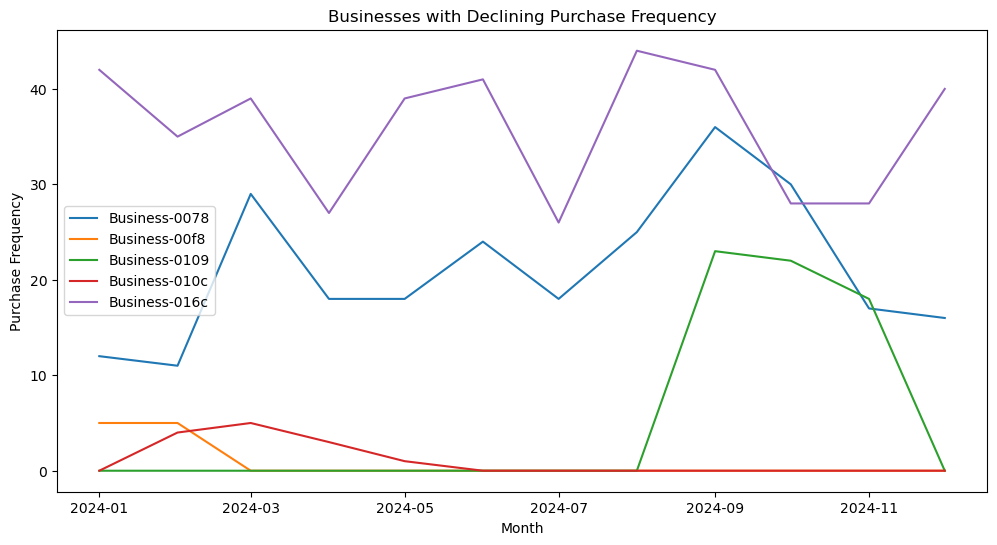

In [9]:
# Count purchases per business per month
business_trends = df.groupby(["ANONYMIZED BUSINESS", "Month_Year"]).size().unstack(fill_value=0)

# Compute month-over-month percentage change
business_trends_change = business_trends.pct_change(axis=1).fillna(0)

# Identify businesses with a negative trend for at least 3 consecutive months
def detect_declining_trend(row):
    return any((row.rolling(3).sum() < 0) & (row != 0))

declining_businesses = business_trends_change.apply(detect_declining_trend, axis=1)
declining_businesses = business_trends[declining_businesses]

# Generate alerts
if not declining_businesses.empty:
    print("\n🚨 ALERT: Businesses with declining purchases 🚨\n")
    for business in declining_businesses.index:
        print(f"⚠ {business} has reduced purchase frequency over the last 3 months!")

business_trends.columns = business_trends.columns.to_timestamp()

# Plot trends for top declining businesses
plt.figure(figsize=(12,6))
for business in declining_businesses.index[:5]:  # Show top 5 businesses
    plt.plot(business_trends.columns, business_trends.loc[business], label=business)

plt.xlabel("Month")
plt.ylabel("Purchase Frequency")
plt.title("Businesses with Declining Purchase Frequency")
plt.legend()
plt.show()

In [8]:
# Aggregate total quantity sold per month for all products
product_sales = df.groupby(["Month_Year", "ANONYMIZED PRODUCT"])["QUANTITY"].sum().unstack(fill_value=0)

# Ensure frequency is set for time-series analysis
product_sales.index = product_sales.index.to_timestamp()
product_sales.loc["Total"] = product_sales.sum(axis=0)
product_sales = product_sales[product_sales.loc["Total"].sort_values(ascending=False).index]
product_sales.head()

ANONYMIZED PRODUCT,Product-66e0,Product-e805,Product-8f75,Product-29ee,Product-4156,Product-3050,Product-086d,Product-d09c,Product-14f3,Product-83fd,...,Product-46c6,Product-8e09,Product-8eda,Product-3dcf,Product-d71d,Product-3bcd,Product-d536,Product-9a4e,Product-317b,Product-e0cc
Month_Year,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,3127,4857,3600,2987,2448,1986,1842,3342,1402,0,...,0,1,0,1,0,0,0,0,0,0
2024-02-01 00:00:00,966,3980,5021,1790,3190,466,2529,2751,636,0,...,0,0,0,0,0,0,0,0,0,0
2024-03-01 00:00:00,2402,3806,5178,3165,38,1180,2530,2748,1105,0,...,0,0,0,0,0,1,0,0,0,0
2024-04-01 00:00:00,3933,3702,2477,2788,1784,2091,1864,2695,1463,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-01 00:00:00,6707,4320,7230,3572,2065,2543,3351,2084,1804,13,...,0,0,0,0,0,0,0,0,0,0


In [10]:
product_sales = product_sales[product_sales.loc["Total"].sort_values().index]
product_sales.head()

ANONYMIZED PRODUCT,Product-e0cc,Product-df39,Product-dcd8,Product-f415,Product-30db,Product-dcda,Product-0990,Product-b638,Product-1a4e,Product-b5f1,...,Product-83fd,Product-14f3,Product-d09c,Product-086d,Product-3050,Product-4156,Product-29ee,Product-8f75,Product-e805,Product-66e0
Month_Year,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,1402,3342,1842,1986,2448,2987,3600,4857,3127
2024-02-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,636,2751,2529,466,3190,1790,5021,3980,966
2024-03-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,1105,2748,2530,1180,38,3165,5178,3806,2402
2024-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,1463,2695,1864,2091,1784,2788,2477,3702,3933
2024-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,13,1804,2084,3351,2543,2065,3572,7230,4320,6707


In [48]:
top_10_products = product_sales.loc['Total'].sort_values(ascending=False).head(10).index

# Subset the original DataFrame to only include the top 10 products
product_sales_top_10 = product_sales[top_10_products]

# Display the top 10 products DataFrame
product_sales_top_10

ANONYMIZED PRODUCT,Product-66e0,Product-e805,Product-8f75,Product-29ee,Product-4156,Product-3050,Product-086d,Product-d09c,Product-14f3,Product-83fd
Month_Year,,,,,,,,,,
2024-01-01 00:00:00,3127,4857,3600,2987,2448,1986,1842,3342,1402,0
2024-02-01 00:00:00,966,3980,5021,1790,3190,466,2529,2751,636,0
2024-03-01 00:00:00,2402,3806,5178,3165,38,1180,2530,2748,1105,0
2024-04-01 00:00:00,3933,3702,2477,2788,1784,2091,1864,2695,1463,0
2024-05-01 00:00:00,6707,4320,7230,3572,2065,2543,3351,2084,1804,13
2024-06-01 00:00:00,6530,3988,2697,4737,2773,2729,2019,1834,2384,292
2024-07-01 00:00:00,5902,5035,1687,5049,3706,2853,593,787,2084,2510
2024-08-01 00:00:00,4197,3088,3126,2736,3598,2175,1103,595,1395,2666
2024-09-01 00:00:00,4233,2522,1876,2573,2172,1848,883,420,1297,3161


In [12]:
bottom_10_products = product_sales.loc['Total'].sort_values().head(10).index

# Subset the original DataFrame to only include the top 10 products
product_sales_bottom_10 = product_sales[bottom_10_products]

# Display the top 10 products DataFrame
product_sales_bottom_10

ANONYMIZED PRODUCT,Product-e0cc,Product-d536,Product-3bcd,Product-d71d,Product-3dcf,Product-8eda,Product-8e09,Product-46c6,Product-8a29,Product-62b0
Month_Year,,,,,,,,,,
2024-01-01 00:00:00,0,0,0,0,1,0,1,0,0,0
2024-02-01 00:00:00,0,0,0,0,0,0,0,0,0,0
2024-03-01 00:00:00,0,0,1,0,0,0,0,0,0,0
2024-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0
2024-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0
2024-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0
2024-07-01 00:00:00,0,0,0,0,0,0,0,0,0,0
2024-08-01 00:00:00,0,0,0,1,0,0,0,0,0,0
2024-09-01 00:00:00,0,0,0,0,0,0,0,0,0,0


In [14]:
# Compute the total value of each transaction
df['TOTAL VALUE'] = df['QUANTITY'] * df['UNIT PRICE']

# ---- Product Category Analysis ----

# Identify the top-performing product category based on total value contribution
category_performance = df.groupby('ANONYMIZED CATEGORY')['TOTAL VALUE'].sum().reset_index()
top_category = category_performance.sort_values(by='TOTAL VALUE', ascending=False).iloc[0]

# ---- Customer Retention Analysis ----

# Identify businesses with reduced purchase frequency over time
business_monthly_purchases = df.groupby(['ANONYMIZED BUSINESS', 'Month_Year'])['TOTAL VALUE'].sum().reset_index()

# Convert Month_Year to datetime format
df['Month_Year'] = df['Month_Year'].astype(str)  # Convert Period to string
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format="%Y-%m")

business_monthly_purchases['Month_Year'] = business_monthly_purchases['Month_Year'].astype(str)
business_monthly_purchases['Month_Year'] = pd.to_datetime(business_monthly_purchases['Month_Year'], format="%Y-%m")
# Pivot table to track purchase trends per business
business_trends = business_monthly_purchases.pivot(index='Month_Year', columns='ANONYMIZED BUSINESS', values='TOTAL VALUE').fillna(0)

# Compute the difference between the last two months
business_trends_diff = business_trends.diff().iloc[-1]

# Identify businesses with a significant drop in purchase frequency (negative values)
dropped_businesses = business_trends_diff[business_trends_diff < 0].reset_index()
dropped_businesses.columns = ['ANONYMIZED BUSINESS', 'Drop in Purchase Value']

# ---- Operational Efficiency ----

# Analyze product demand seasonality
monthly_category_sales = df.groupby(['Month_Year', 'ANONYMIZED CATEGORY'])['TOTAL VALUE'].sum().unstack()

# Identify categories with strong seasonal variations
seasonal_variation = monthly_category_sales.std().sort_values(ascending=False)

# Suggest inventory and supply chain optimizations
high_variability_categories = seasonal_variation[seasonal_variation > seasonal_variation.mean()].index

In [71]:
top_category

ANONYMIZED CATEGORY    Category-75
TOTAL VALUE              544658700
Name: 25, dtype: object

In [85]:
high_variability_categories

Index(['Category-75', 'Category-76', 'Category-120', 'Category-100',
       'Category-77', 'Category-119', 'Category-91'],
      dtype='object', name='ANONYMIZED CATEGORY')

In [22]:
dropped_businesses.sort_values(by="Drop in Purchase Value", key = abs, ascending = False).head(10)

,ANONYMIZED BUSINESS,Drop in Purchase Value
1147,Business-cb1f,-2615320.0
1401,Business-fe7d,-2089958.0
30,Business-07de,-1112108.0
195,Business-24c3,-1026925.0
571,Business-64de,-879984.0
263,Business-2f6a,-803270.0
132,Business-1ae8,-774905.0
753,Business-8119,-741348.0
556,Business-61e9,-692015.0
481,Business-5613,-617327.0
